In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("ml_dataset.csv")

In [3]:
print("Return first 5 rows.","\n")
df

Return first 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0
...,...,...,...,...,...
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0


In [4]:
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



In [5]:

del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [6]:

dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [7]:
dataset.head()

,Consumption,Month,Year,Date,Time,Day,Week
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,Friday,53
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,Friday,53
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,Friday,53
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,Friday,53
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,Friday,53


In [8]:
features = dataset[['Month', 'Year', 'Week']]
print(features.tail())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=dataset.index)
final_df = pd.concat([principal_df, dataset[['Consumption']]], axis=1)
print(final_df.tail())
print(final_df['Consumption'].max())
final_df = pd.concat([features, dataset[['Consumption']]], axis=1)

                     Month  Year  Week
DateTime                              
2021-12-31 20:00:00     12  2021    52
2021-12-31 21:00:00     12  2021    52
2021-12-31 22:00:00     12  2021    52
2021-12-31 23:00:00     12  2021    52
2022-01-01 00:00:00      1  2022    52
                          PC1       PC2  Consumption
DateTime                                            
2021-12-31 20:00:00  2.314690  1.459907      11447.0
2021-12-31 21:00:00  2.314690  1.459907      11237.0
2021-12-31 22:00:00  2.314690  1.459907      10914.0
2021-12-31 23:00:00  2.314690  1.459907      10599.0
2022-01-01 00:00:00  0.058129  2.056391      10812.0
15105.0


In [15]:
# Using Knn Algorithm

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("ml_dataset.csv")
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)


dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

features = dataset[['Month', 'Year', 'Week']]
final_df = pd.concat([features, dataset[['Consumption']]], axis=1)
X = final_df[['Month', 'Year', 'Week']]
y = final_df['Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




def knn_regression(X_train, y_train, X_test, k):
    predicted_values = []
    for new_data_point in X_test.values:  # Iterate over each row in X_test
        new_data_point = new_data_point.reshape(1, -1)  # Reshape to match X_train
        diff_squared = (X_train.values - new_data_point)**2
        distances = np.sum(diff_squared, axis=1)
        distances_=[]
        for i in distances:
                     distances_.append(math.sqrt(i))
        nearest_neighbors_indices = np.argsort(distances_)[:k]
        nearest_neighbors_values = y_train.iloc[nearest_neighbors_indices]
        predicted_value = nearest_neighbors_values.mean()
        predicted_values.append(predicted_value)
    return predicted_values

k = 20
predicted_consumption = knn_regression(X_train, y_train, X_test, k)
print(predicted_consumption)
print("Predicted Consumption:", predicted_consumption)


[8028.8, 10465.45, 7857.95, 8232.5, 8053.65, 12781.8, 7838.85, 9840.35, 8351.9, 8187.05, 11417.2, 10736.25, 10625.55, 8439.0, 8417.15, 9974.55, 10352.2, 9840.35, 10109.3, 11124.85, 10064.15, 8021.7, 7842.7, 9804.85, 9381.0, 9457.1, 10020.25, 10421.6, 10064.15, 10067.05, 10775.9, 7842.7, 8053.65, 8333.7, 11737.65, 7702.65, 11852.55, 9206.05, 11188.1, 8351.9, 10028.55, 11290.4, 9083.35, 10238.75, 9024.45, 8111.95, 10075.25, 9553.95, 9100.9, 7896.55, 7858.5, 11231.45, 7643.45, 9373.45, 9697.7, 9057.4, 10874.8, 10457.0, 7628.95, 8614.8, 11883.55, 7255.35, 12314.95, 8083.15, 8333.7, 8387.95, 8701.35, 7402.3, 10163.65, 8480.5, 9667.4, 9553.95, 8649.9, 9024.45, 10487.55, 11580.35, 9606.4, 8198.7, 9912.25, 8358.3, 8210.25, 9566.05, 11806.8, 11354.4, 8602.7, 8052.6, 8805.35, 7896.55, 7350.5, 8417.15, 8340.75, 9457.1, 10120.1, 8666.75, 7778.9, 9403.7, 10064.6, 12663.1, 11552.7, 10024.05, 8325.6, 11423.25, 8313.15, 9566.05, 9748.1, 8402.1, 9983.05, 7842.7, 10741.1, 11412.75, 9538.85, 9533.2, 9395

In [10]:
## Using Ann Algorithm

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

def sigmoid(p):
    return 1 / (1 + np.power(np.e, -p))
def sigmoid_d(p):
    return p*(1-p)

# def initialize_weights(input_size, hidden_size, output_size):
#     weights_input_hidden = np.random.rand(input_size, hidden_size)
#     weights_hidden_output = np.random.rand(hidden_size, output_size)
#     bias_hidden = np.random.rand(1, hidden_size)
#     bias_output = np.random.rand(1, output_size)
#     return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

def initialize_weights(input_size, hidden_size, output_size):
    # Xavier initialization for weights
    limit_input_hidden = np.sqrt(2.0 / (input_size + hidden_size))
    limit_hidden_output = np.sqrt(2.0 / (hidden_size + output_size))

    weights_input_hidden = np.random.uniform(-limit_input_hidden, limit_input_hidden, size=(input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-limit_hidden_output, limit_hidden_output, size=(hidden_size, output_size))

    # Bias initialization
    bias_hidden = np.zeros((1, hidden_size))
    bias_output = np.zeros((1, output_size))

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output



def forward(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):

    val_hidden = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(val_hidden)


    val_output = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = sigmoid(val_output)
    print(output)
    return output, hidden_output

def backward(X, y, output, hidden_output, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate):

    output=sigmoid_d(output)
    error_output = (output) * (1 - output) * (y - output)
    delta_output = error_output

    weights_hidden_output += learning_rate * np.dot(hidden_output.T, delta_output)
    bias_output += learning_rate * np.sum(delta_output, axis=0)

    weights_hidden_output = np.clip(weights_hidden_output, -1,1)
    bias_output = np.clip(bias_output, -1,1)


    error_hidden = (hidden_output) * (1 - hidden_output) * np.dot(delta_output, weights_hidden_output.T)
    delta_hidden = error_hidden


    weights_input_hidden += learning_rate * np.dot(X.T, delta_hidden)
    bias_hidden += learning_rate * np.sum(delta_hidden, axis=0)


    weights_input_hidden = np.clip(weights_input_hidden, -1,1)
    bias_hidden = np.clip(bias_hidden, -1, 1)

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

def train(X_train, y_train, input_size, hidden_size, output_size, epochs, learning_rate):
    global scaler

    X_train_normalized = scaler.fit_transform(X_train)

    global scaler1
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    y_train_normalized = scaler1.fit_transform(y_train)

    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = initialize_weights(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        output, hidden_output = forward(X_train_normalized, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
        weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = backward(X_train_normalized, y_train_normalized, output, hidden_output, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate)
        if (epoch+1) % 10 == 0:
            loss = np.mean(np.square(y_train_normalized - output))
            print(f'Epoch {epoch+1}, Loss: {loss:.4f}')
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

def predict(X_test, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    X_test_normalized = scaler.transform(X_test)
    output, _ = forward(X_test_normalized, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
    return output
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_square_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    squared_diff = (y_true - y_pred)
    mse = np.mean(squared_diff)
    return mse



file_path = 'ml_dataset.csv'
data = pd.read_csv(file_path)


del data["Start time UTC"]
del data["End time UTC"]
del data["Start time UTC+03:00"]
data.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(data.head(5))

dataset = data
dataset["Month"] = pd.to_datetime(data["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(data["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(data["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(data["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(data["DateTime"]).dt.day_name()
dataset["Week"] = pd.to_datetime(data["DateTime"]).dt.isocalendar().week
dataset = data.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
features = dataset[['Month', 'Year', 'Week']]
final_df = pd.concat([features, dataset[['Consumption']]], axis=1)
X = final_df.iloc[:, :-1].values
y = final_df.iloc[:, -1].values.reshape(-1, 1)
input_size = X.shape[1]
hidden_size = 4
output_size = 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = train(X_train, y_train, input_size, hidden_size, output_size, epochs=1000, learning_rate=0.0001)


predictions = predict(X_test, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
print(predictions)
Y_predicted = scaler1.inverse_transform(predictions)

print(Y_predicted)
MAPE = mean_absolute_percentage_error(Y_predicted, y_test)
print("MAPE")
print(MAPE)
MSE=mean_square_error(Y_predicted, y_test)
print("MSE")
print(MSE)


Streaming output truncated to the last 5000 lines.
 ...
 [0.98820909]
 [0.98184245]
 [0.98890129]]
Epoch 300, Loss: 0.3433
[[0.99119607]
 [0.98965744]
 [0.98908506]
 ...
 [0.98821512]
 [0.98184437]
 [0.98890875]]
[[0.99120152]
 [0.98966345]
 [0.98909289]
 ...
 [0.98822112]
 [0.98184629]
 [0.98891618]]
[[0.99120695]
 [0.98966944]
 [0.98910069]
 ...
 [0.98822712]
 [0.9818482 ]
 [0.98892359]]
[[0.99121235]
 [0.98967542]
 [0.98910846]
 ...
 [0.98823309]
 [0.98185011]
 [0.98893098]]
[[0.99121773]
 [0.98968137]
 [0.9891162 ]
 ...
 [0.98823906]
 [0.98185202]
 [0.98893833]]
[[0.99122309]
 [0.98968731]
 [0.98912392]
 ...
 [0.988245  ]
 [0.98185393]
 [0.98894567]]
[[0.99122843]
 [0.98969323]
 [0.98913161]
 ...
 [0.98825093]
 [0.98185583]
 [0.98895298]]
[[0.99123374]
 [0.98969913]
 [0.98913927]
 ...
 [0.98825684]
 [0.98185773]
 [0.98896026]]
[[0.99123903]
 [0.98970501]
 [0.98914691]
 ...
 [0.98826274]
 [0.98185963]
 [0.98896753]]
[[0.9912443 ]
 [0.98971087]
 [0.98915451]
 ...
 [0.98826863]
 [0.98

In [11]:
MAPE = mean_absolute_percentage_error(Y_predicted, y_test)
print("MAPE")
print(MAPE)

MAPE
36.73256412381046


In [12]:
MSE=mean_square_error(Y_predicted, y_test)
print("MSE")
print(MSE)

MSE
5512.300489048235


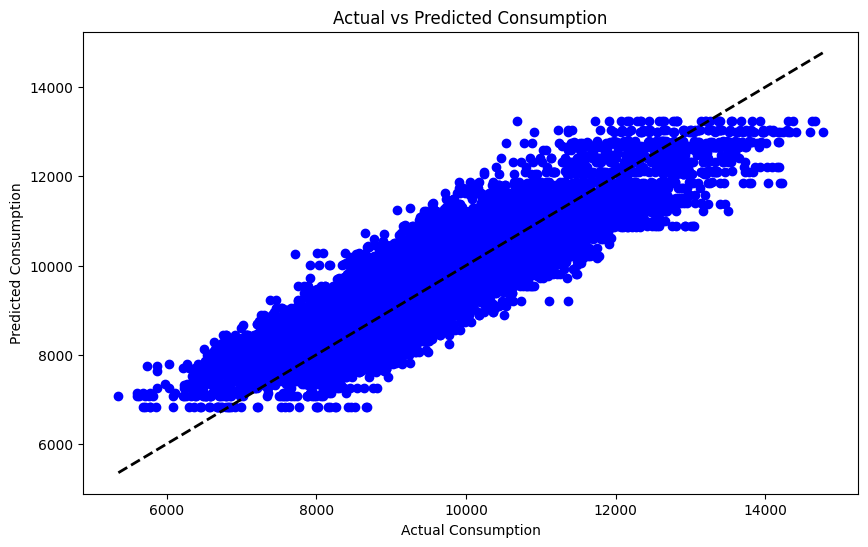

Mean Absolute Error (MAE): 610.370247309798
Mean Squared Error (MSE): 529928.6225717387


In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_csv("ml_dataset.csv")
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)


dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

features = dataset[['Month', 'Year', 'Week']]
final_df = pd.concat([features, dataset[['Consumption']]], axis=1)
X = final_df[['Month', 'Year', 'Week']]
y = final_df['Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






def knn_regression(X_train, y_train, X_test, k):
    predicted_values = []
    for new_data_point in X_test.values:  # Iterate over each row in X_test
        new_data_point = new_data_point.reshape(1, -1)  # Reshape to match X_train
        # Optimized distance calculation
        distances = np.sum((X_train.values - new_data_point)**2, axis=1)
        distances_=[]
        for i in distances:

          distances_.append(math.sqrt(i))
        nearest_neighbors_indices = np.argsort(distances)[:k]
        nearest_neighbors_values = y_train.iloc[nearest_neighbors_indices]
        predicted_value = nearest_neighbors_values.mean()
        predicted_values.append(predicted_value)
    return predicted_values

# Predict consumption
k = 20
predicted_consumption = knn_regression(X_train, y_train, X_test, k)

# Visualize predicted vs actual consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_consumption, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Consumption')
plt.show()

# Evaluate model
mae = mean_absolute_error(y_test, predicted_consumption)
mse = mean_squared_error(y_test, predicted_consumption)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


In [14]:
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    y_true = np.where(y_true == 0, 1e-10, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predicted_consumption)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 6.650855568387012
